In [20]:
# https://www.geeksforgeeks.org/hidden-markov-model-in-machine-learning/

In [75]:

# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

In [76]:
# Define the state space
states = ["Sunny", "Rainy"]
n_states = len(states)
print('Number of hidden states :',n_states)
# Define the observation space
observations = ["Dry", "Wet"]
n_observations = len(observations)
print('Number of observations  :',n_observations)

Number of hidden states : 2
Number of observations  : 2


In [77]:
# Define the initial state distribution
state_probability = np.array([0.6, 0.4])
print("State probability: ", state_probability)

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.3],
                                   [0.3, 0.7]])
print("\nTransition probability:\n", transition_probability)
# Define the observation likelihoods
emission_probability= np.array([[0.9, 0.1],
                                 [0.2, 0.8]])
print("\nEmission probability:\n", emission_probability)

State probability:  [0.6 0.4]

Transition probability:
 [[0.7 0.3]
 [0.3 0.7]]

Emission probability:
 [[0.9 0.1]
 [0.2 0.8]]


In [78]:

model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

In [79]:
# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [80]:
# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)


Most likely hidden states: [0 1 1 1 0 0]


In [81]:
log_probability, hidden_states = model.decode(observations_sequence,
											lengths = len(observations_sequence),
											algorithm ='viterbi' )

print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_states)


Log Probability : -6.360602626270058
Most likely hidden states: [0 1 1 1 0 0]


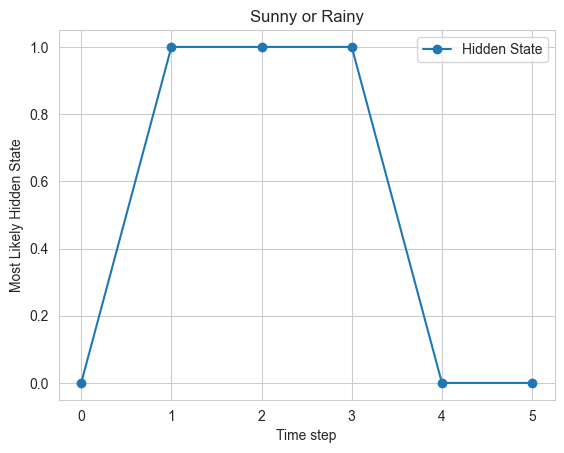

In [83]:
# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Sunny or Rainy")
plt.legend()
plt.show()
